In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
titanic = sns.load_dataset('titanic')
titanic.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
titanic['family'] = titanic.sibsp + titanic.parch
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)
df1 = titanic.copy()
df1.embarked.fillna(value='S', inplace=True)
age_md = df1.groupby(['pclass', 'sex']).age.agg(['median'])
m1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].median()
m2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'male'), 'age'].median()
m3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'male'), 'age'].median()
f1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'female'), 'age'].median()
f2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'female'), 'age'].median()
f3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'female'), 'age'].median()
df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].fillna(m1_med, inplace=True)
df1.loc[(df1.pclass == 1) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m3_med
df1.loc[(df1.pclass == 1) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f3_med
df1.drop('deck', axis=1, inplace=True)
df1.age_new = 0
df1.loc[df1.age >= 50, 'age_new'] = 'old'
df1.loc[(df1.age < 50) & (df1.age >= 10), 'age_new'] = 'young'
df1.loc[df1.age < 10, 'age_new'] = 'baby'
for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
print(df1_sex_encoder.inverse_transform([0]))
print(df1_embarked_encoder.inverse_transform([0]))
print(df1_age_new_encoder.inverse_transform([0]))

['female']
['C']
['baby']


In [ ]:
# 항상 찾고자 하는 값이 positive 1이 되어야 함.
# 보통 찾고자 하는 값이 1이기 때문에 TN은 잘 보지 않음
# TN이 중요한 경우는 찾고자 하는 값만큼 비교 대상이 중요한 경우
# TN(true negative), TP(true positive), FN(false negative), TP(true positive) 
# 정확도 = (TN + TP) / (TN + FP + FN +TP)
# 정밀도(precision) 실제 음성인 데이터 예측을 양성으로 잘못 판단 시 업무상 큰 영향이 발생하는 경우
# 재현율(recall) 실제 양성 데이터를 음ㅁ성으로 잘못 판단 시 업무 상 큰 영향이 발생하는 경우

In [6]:
from sklearn.tree import export_graphviz
import graphviz

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
def get_clf_eval(y_test, pred):
    print('오차 행렬 \n', confusion_matrix(y_test, pred))
    print('정확도 : %f, 정밀도 : %f, 재현율 : %f' %(accuracy_score(y_test, pred), 
                                           confusion_matrix(y_test, pred)[1][1]/(confusion_matrix[1][0]+confusion_matrix(y_test, pred)[1][1]),
                                           confusion_matrix(y_test, pred)[1][1]/(confusion_matrix[0][1]+confusion_matrix(y_test, pred)[1][1])))

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : ', round(accuracy, 2))
    print('정밀도 : ', round(precision, 2))
    print('정확도 : ', round(recall, 2))

In [11]:
from sklearn.preprocessing import LabelEncoder
titanic = sns.load_dataset('titanic')
titanic.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
titanic['family'] = titanic.sibsp + titanic.parch
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)
df1 = titanic.copy()
df1.embarked.fillna(value='S', inplace=True)
age_md = df1.groupby(['pclass', 'sex']).age.agg(['median'])
m1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].median()
m2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'male'), 'age'].median()
m3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'male'), 'age'].median()
f1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'female'), 'age'].median()
f2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'female'), 'age'].median()
f3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'female'), 'age'].median()
df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].fillna(m1_med, inplace=True)
df1.loc[(df1.pclass == 1) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m3_med
df1.loc[(df1.pclass == 1) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f3_med
df1.drop('deck', axis=1, inplace=True)
df1.age_new = 0
df1.loc[df1.age >= 50, 'age_new'] = 'old'
df1.loc[(df1.age < 50) & (df1.age >= 10), 'age_new'] = 'young'
df1.loc[df1.age < 10, 'age_new'] = 'baby'
for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
print(df1_sex_encoder.inverse_transform([0]))
print(df1_embarked_encoder.inverse_transform([0]))
print(df1_age_new_encoder.inverse_transform([0]))
X = df1.drop('survived', axis=1)
y = df1.survived

['female']
['C']
['baby']


In [12]:
X

,pclass,sex,age,fare,embarked,family,age_new
0,3,1,22.0,7.2500,2,1,2
1,1,0,38.0,71.2833,0,1,2
2,3,0,26.0,7.9250,2,0,2
3,1,0,35.0,53.1000,2,1,2
4,3,1,35.0,8.0500,2,0,2
...,...,...,...,...,...,...,...
886,2,1,27.0,13.0000,2,0,2
887,1,0,19.0,30.0000,2,0,2
888,3,0,21.5,23.4500,2,3,2
889,1,1,26.0,30.0000,0,0,2


In [13]:
from sklearn.tree import DecisionTreeClassifier
titanic_dtclf = DecisionTreeClassifier()
titanic_dtclf.fit(X,y)
export_graphviz(titanic_dtclf, out_file='titanic.dot', 
                feature_names=X.columns,
                class_names=['사망', '생존'],
                filled=True)

In [16]:
test = pd.read_csv('./test.csv')
test['family'] = test.SibSp + test.Parch
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test.Fare.fillna(value=test[(test.family == 0)&(test.Pclass == 3)].Fare.mean(), inplace=True)

In [17]:
m1_med = test.loc[(test.Pclass == 1) & (test.Sex == 'male'), 'Age'].median()
m2_med = test.loc[(test.Pclass == 2) & (test.Sex == 'male'), 'Age'].median()
m3_med = test.loc[(test.Pclass == 3) & (test.Sex == 'male'), 'Age'].median()
f1_med = test.loc[(test.Pclass == 1) & (test.Sex == 'female'), 'Age'].median()
f2_med = test.loc[(test.Pclass == 2) & (test.Sex == 'female'), 'Age'].median()
f3_med = test.loc[(test.Pclass == 3) & (test.Sex == 'female'), 'Age'].median()
test.loc[(test.Pclass == 1) & (test.Sex == 'male'), 'Age'].fillna(m1_med, inplace=True)
test.loc[(test.Pclass == 1) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m1_med
test.loc[(test.Pclass == 2) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m2_med
test.loc[(test.Pclass == 3) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m3_med
test.loc[(test.Pclass == 1) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f1_med
test.loc[(test.Pclass == 2) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f2_med
test.loc[(test.Pclass == 3) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f3_med

In [20]:
test.loc[test.Age >= 50, 'age_new'] = 'old'
test.loc[(test.Age < 50) & (test.Age >= 10), 'age_new'] = 'young'
test.loc[test.Age < 10, 'age_new'] = 'baby'
test.rename(columns={'Pclass':'pclass','Sex':'sex','Age':'age', 'Fare':'fare', 'Embarked':'embarked'}, inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

for i in ['sex', 'embarked', 'age_new']:
    globals()[f'new_test_{i}_encoder'] = LabelEncoder()
    globals()[f'new_test_{i}_encoder'].fit(test[i])
    test[i] = globals()[f'new_test_{i}_encoder'].transform(test[i])

In [22]:
print(new_test_sex_encoder.classes_)
print(new_test_embarked_encoder.classes_)
print(new_test_age_new_encoder.classes_)

['female' 'male']
['C' 'Q' 'S']
['baby' 'old' 'young']


In [24]:
df1_survived_encoder = LabelEncoder()
df1_survived_encoder.fit(df1['survived'])
df1['survived'] = df1_survived_encoder.transform(df1['survived'])

In [25]:
print(df1_survived_encoder.classes_)

[0 1]


In [26]:
pred_result = titanic_dtclf.predict(test)
pred_result1 = df1_survived_encoder.inverse_transform(pred_result)
pred_result

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
test['predict_survived'] = pred_result1

In [81]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)
pred = dt_clf.predict(X)
X['predict_survived'] = pred

In [36]:
get_clf_eval(y, pred)

오차 행렬
[[547   2]
 [ 15 327]]
정확도 :  0.98
정밀도 :  0.99
정확도 :  0.96


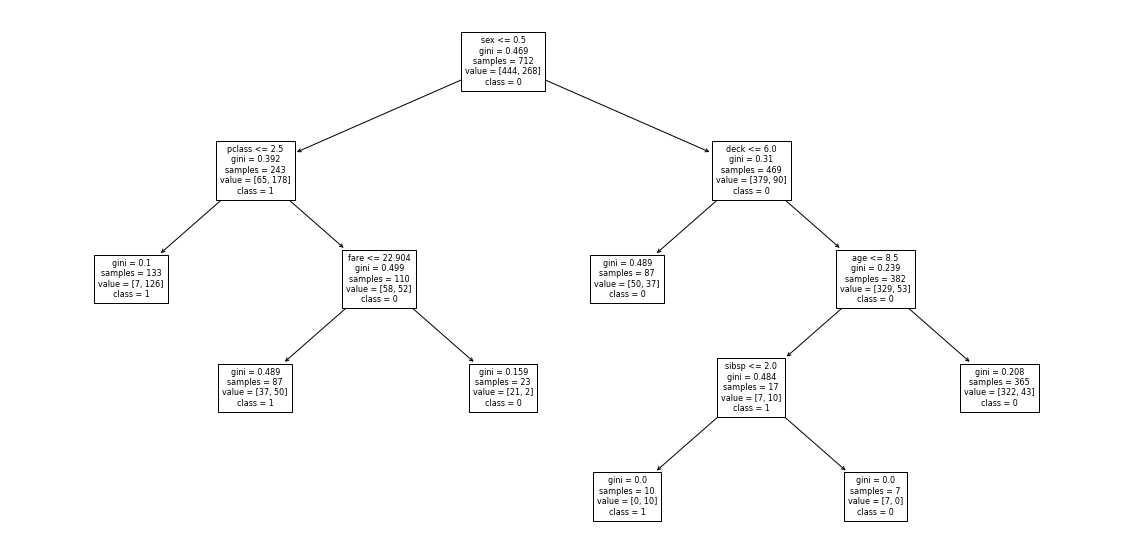

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
df = sns.load_dataset('titanic') # seaborn에서 타이타닉 데이터셋을 불러와 df에 저장
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True) # 불필요한 컬럼을 제거
df1 = df.copy() # df1에 df의 카피를 저장
df1.deck = df1.deck.astype('O') # 카테고리 타입인 df1의 deck를 오브젝트 타입으로 변경 - 카테고리 타입은 기존에 있던 데이터 값이 아니면 입력 불가
# 결측치 처리
df1.embarked.fillna('S', inplace=True) # df1 embarked 컬럼의 결측치에 전부 'S'를 채워줌
df1.age.fillna(df1.age.mean(), inplace=True) # df1 age 컬럼의 결측치에 age의 평균값을 채워줌
df1.deck.fillna('N', inplace=True) # df1 deck 컬럼의 결측치에 'N'을 채워줌
def label_encoding(df):
    ecs = df.columns[(df.dtypes=='O')|(df.dtypes=='category')|(df.dtypes=='bool')]
    for i in ecs:
        globals()[f'{df}_{i}_encoder'] = LabelEncoder()
        globals()[f'{df}_{i}_encoder'].fit(df[i])
        df[i] = globals()[f'{df}_{i}_encoder'].transform(df[i])
label_encoding(df1)
X = df1.drop('survived', axis=1)
y = df1.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score   = f1_score(y_test, pred)
    return accuracy, recall, precision, f1score
dtclf = DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)
plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'],
          feature_names=X_train.columns, fontsize=8)
plt.show()

오차 행렬
[[93  9]
 [26 51]]
정확도 :  0.8
정밀도 :  0.85
정확도 :  0.66


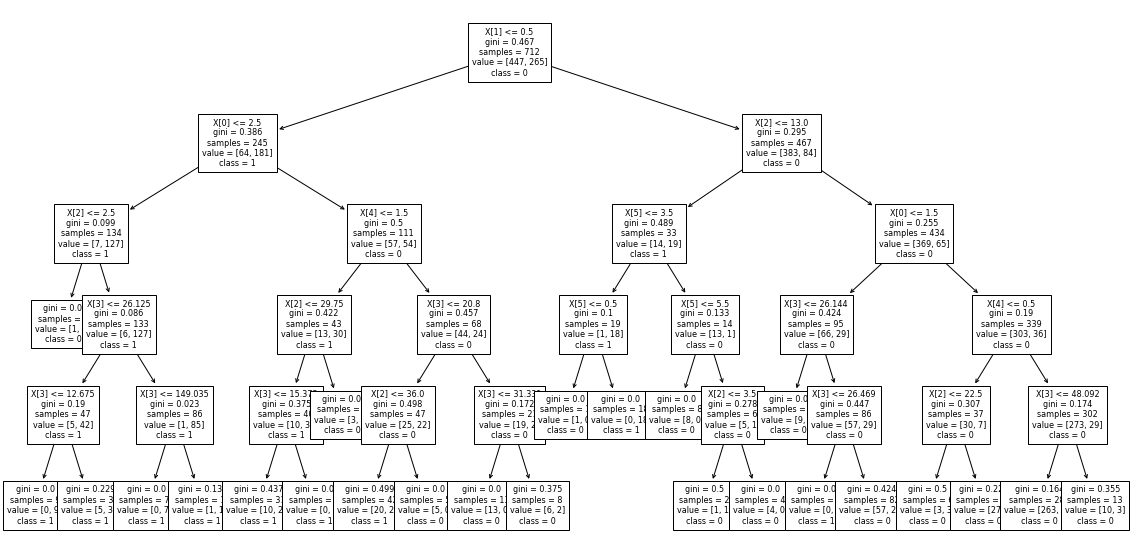

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
dtclf = DecisionTreeClassifier(max_depth=5)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)
plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'], fontsize=8)
plt.show()

In [51]:
pred=dtclf.predict(X_test)
pred_pro=dtclf.predict_proba(X_test)
a=pd.DataFrame(pred)
b=pd.DataFrame(pred_pro)
pd.concat([a,b],axis=1)

,0,0,1
0,1,0.131579,0.868421
1,0,0.500000,0.500000
2,0,0.910035,0.089965
3,0,1.000000,0.000000
4,0,0.695122,0.304878
...,...,...,...
174,0,0.910035,0.089965
175,0,0.910035,0.089965
176,0,1.000000,0.000000
177,0,1.000000,0.000000


In [46]:
pred = dtclf.predict_(X_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'predict_'

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
titanic = sns.load_dataset('titanic')
titanic.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
titanic['family'] = titanic.sibsp + titanic.parch
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)
df1 = titanic.copy()
df1.embarked.fillna(value='S', inplace=True)
age_md = df1.groupby(['pclass', 'sex']).age.agg(['median'])
m1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].median()
m2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'male'), 'age'].median()
m3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'male'), 'age'].median()
f1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'female'), 'age'].median()
f2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'female'), 'age'].median()
f3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'female'), 'age'].median()
df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].fillna(m1_med, inplace=True)
df1.loc[(df1.pclass == 1) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m3_med
df1.loc[(df1.pclass == 1) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f3_med
df1.drop('deck', axis=1, inplace=True)
df1.age_new = 0
df1.loc[df1.age >= 50, 'age_new'] = 'old'
df1.loc[(df1.age < 50) & (df1.age >= 10), 'age_new'] = 'young'
df1.loc[df1.age < 10, 'age_new'] = 'baby'
for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
print(df1_sex_encoder.inverse_transform([0]))
print(df1_embarked_encoder.inverse_transform([0]))
print(df1_age_new_encoder.inverse_transform([0]))
X = df1.drop('survived', axis=1)
y = df1.survived

['female']
['C']
['baby']


In [53]:
from sklearn.model_selection import train_test_split

X=df1.drop('survived',axis=1)
y=df1.survived

X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.3, random_state=12)
#random_state= 몇개씩 자를 것인지

from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train,y_train)
pred=dtclf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(f'TN {confusion[0][0]}\t/ FP {confusion[0][1]}')
    print(f'FN {confusion[1][0]}\t/ TP {confusion[1][1]}')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))


In [55]:
pred=dtclf.predict(X_test)
pred_pro=dtclf.predict_proba(X_test)
a=pd.DataFrame(pred)
b=pd.DataFrame(pred_pro)
ab=pd.concat([a,b],axis=0)

In [56]:
ab.rename(columns={0:'pred',1:'pred_proba'})

,pred,pred_proba
0,0.0,NaN
1,1.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
263,0.5,0.5
264,1.0,0.0
265,1.0,0.0
266,1.0,0.0


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)

df1 = df.copy()
df1.deck = df1.deck.astype('O')

# 결측치 처리
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(df1.age.mean(), inplace=True)
df1.deck.fillna('N', inplace=True)

def label_encoding(df):
    ecs = df.columns[(df.dtypes=='O')|(df.dtypes=='category')|(df.dtypes=='bool')]
    for i in ecs:
        globals()[f'{df}_{i}_encoder'] = LabelEncoder()
        globals()[f'{df}_{i}_encoder'].fit(df[i])
        df[i] = globals()[f'{df}_{i}_encoder'].transform(df[i])

label_encoding(df1)

X = df1.drop('survived', axis=1)
y = df1.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

---------------
1. 오차행렬
[[90 22]
 [10 57]]
2. 정확도: 0.82
3. 정밀도: 0.72
4. 재현율: 0.85
---------------


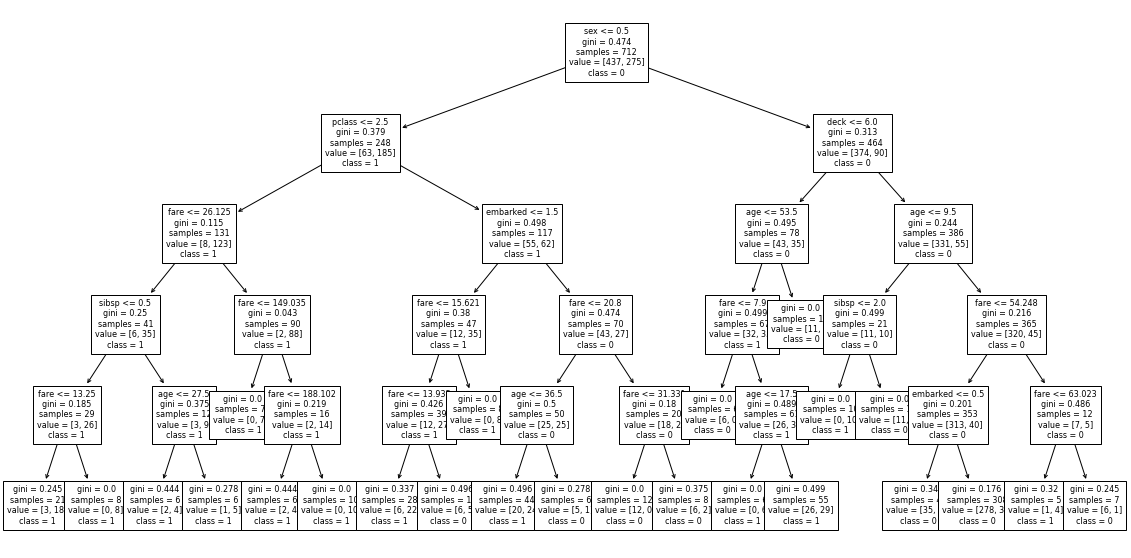

In [59]:
#!/usr/bin/env python
# coding: utf-8

# ### 타이타닉 의사결정나무

# In[89]:

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    print('-'*15)
    print('1. 오차행렬')
    print(confusion)
    print('2. 정확도:', round(accuracy, 2))
    print('3. 정밀도:', round(precision, 2))
    print('4. 재현율:', round(recall, 2))
    print('-'*15)

dtclf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)

plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'], 
          feature_names=X_train.columns, fontsize=8)
plt.show()

In [61]:
pred_proba = dtclf.predict_proba(X_test)
pred_proba

array([[0.47272727, 0.52727273],
       [0.33333333, 0.66666667],
       [0.21428571, 0.78571429],
       [0.9025974 , 0.0974026 ],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.9025974 , 0.0974026 ],
       [0.9025974 , 0.0974026 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.9025974 , 0.0974026 ],
       [0.9025974 , 0.0974026 ],
       [0.9025974 , 0.0974026 ],
       [0.9025974 , 0.0974026 ],
       [0.9025974 , 0.0974026 ],
       [0.47272727, 0.52727273],
       [0.14285714, 0.85714286],
       [0.9025974 , 0.0974026 ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.45454545, 0.54545455],
       [0.47272727, 0.52727273],
       [0.9025974 , 0.0974026 ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.9025974 , 0.0974026 ],
       [0.9025974 , 0.0974026 ],
       [0.

In [91]:
pred_proba = dtclf.predict_proba(X_test)
pred_proba1 = pred_proba[:, 1]

In [64]:
pred = dtclf.predict(X_test)
len(dtclf.predict(X_test))
p_pp_df = pd.DataFrame([pred, pred_proba]).T
p_pp_df.columnsmns = ['pred', 'pred_proba']
p_pp_df.head(20)

,0,1
0,1.0,0.527273
1,1.0,0.666667
2,1.0,0.785714
3,0.0,0.097403
4,1.0,1.000000
5,0.0,0.250000
6,1.0,1.000000
7,1.0,1.000000
8,0.0,0.000000
9,0.0,0.097403


In [65]:
from sklearn.preprocessing import Binarizer
x = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

In [73]:
B = Binarizer(threshold=1.1)

In [74]:
B.fit_transform(x)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,3,1,22.000000,1,0,7.2500,2,7
1,1,0,38.000000,1,0,71.2833,0,2
2,3,0,26.000000,0,0,7.9250,2,7
3,1,0,35.000000,1,0,53.1000,2,2
4,3,1,35.000000,0,0,8.0500,2,7
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,7
887,1,0,19.000000,0,0,30.0000,2,1
888,3,0,29.699118,1,2,23.4500,2,7
889,1,1,26.000000,0,0,30.0000,0,2


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : ', round(accuracy, 2))
    print('정밀도 : ', round(precision, 2))
    print('정확도 : ', round(recall, 2))

In [98]:
B.fit_transform(x)
pred_proba1.reshape(-1,1)

array([[0.52727273],
       [0.66666667],
       [0.78571429],
       [0.0974026 ],
       [1.        ],
       [0.25      ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.0974026 ],
       [0.0974026 ],
       [1.        ],
       [1.        ],
       [0.0974026 ],
       [0.0974026 ],
       [0.0974026 ],
       [0.0974026 ],
       [0.0974026 ],
       [0.52727273],
       [0.85714286],
       [0.0974026 ],
       [1.        ],
       [0.        ],
       [0.54545455],
       [0.52727273],
       [0.0974026 ],
       [1.        ],
       [0.        ],
       [0.0974026 ],
       [0.0974026 ],
       [0.0974026 ],
       [0.8       ],
       [1.        ],
       [0.52727273],
       [0.0974026 ],
       [0.        ],
       [0.54545455],
       [0.0974026 ],
       [0.0974026 ],
       [1.        ],
       [0.78571429],
       [1.        ],
       [0.52727273],
       [0.83333333],
       [0.22222222],
       [0.0974026 ],
       [0.52727273],
       [0.222

In [123]:
B0 = Binarizer(threshold=0).fit(pred_proba1.reshape(-1,1))
B0.transform(pred_proba1.reshape(-1,1))
B1 = Binarizer(threshold=0.1).fit(pred_proba1.reshape(-1,1))
B1.transform(pred_proba1.reshape(-1,1))
B2 = Binarizer(threshold=0.2).fit(pred_proba1.reshape(-1,1))
B2.transform(pred_proba1.reshape(-1,1))
B3 = Binarizer(threshold=0.3).fit(pred_proba1.reshape(-1,1))
B3.transform(pred_proba1.reshape(-1,1))
B4 = Binarizer(threshold=0.4).fit(pred_proba1.reshape(-1,1))
B4.transform(pred_proba1.reshape(-1,1))
B5 = Binarizer(threshold=0.5).fit(pred_proba1.reshape(-1,1))
B5.transform(pred_proba1.reshape(-1,1))
B6 = Binarizer(threshold=0.6).fit(pred_proba1.reshape(-1,1))
B6.transform(pred_proba1.reshape(-1,1))
B7 = Binarizer(threshold=0.7).fit(pred_proba1.reshape(-1,1))
B7.transform(pred_proba1.reshape(-1,1))
B8 = Binarizer(threshold=0.8).fit(pred_proba1.reshape(-1,1))
B8.transform(pred_proba1.reshape(-1,1))
B9 = Binarizer(threshold=0.9).fit(pred_proba1.reshape(-1,1))
B9.transform(pred_proba1.reshape(-1,1))
B10 = Binarizer(threshold=1.0).fit(pred_proba1.reshape(-1,1))
B10.transform(pred_proba1.reshape(-1,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [99]:
B5 = Binarizer(threshold=0.5).fit(pred_proba1.reshape(-1,1))
B5.transform(pred_proba1.reshape(-1,1))

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

In [124]:
B00 = pd.DataFrame(B0.transform(pred_proba1.reshape(-1,1)))
B01 = pd.DataFrame(B1.transform(pred_proba1.reshape(-1,1)))
B02 = pd.DataFrame(B2.transform(pred_proba1.reshape(-1,1)))
B03 = pd.DataFrame(B3.transform(pred_proba1.reshape(-1,1)))
B04 = pd.DataFrame(B4.transform(pred_proba1.reshape(-1,1)))
B05 = pd.DataFrame(B5.transform(pred_proba1.reshape(-1,1)))
B06 = pd.DataFrame(B6.transform(pred_proba1.reshape(-1,1)))
B07 = pd.DataFrame(B7.transform(pred_proba1.reshape(-1,1)))
B08 = pd.DataFrame(B8.transform(pred_proba1.reshape(-1,1)))
B09 = pd.DataFrame(B9.transform(pred_proba1.reshape(-1,1)))
B10 = pd.DataFrame(B10.transform(pred_proba1.reshape(-1,1)))

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
174,1.0
175,0.0
176,1.0
177,1.0


In [125]:
print(confusion_matrix(B00, y_test))
print(confusion_matrix(B01, y_test))
print(confusion_matrix(B02, y_test))
print(confusion_matrix(B03, y_test))
print(confusion_matrix(B04, y_test))
print(confusion_matrix(B05, y_test))
print(confusion_matrix(B06, y_test))
print(confusion_matrix(B07, y_test))
print(confusion_matrix(B08, y_test))
print(confusion_matrix(B09, y_test))
print(confusion_matrix(B10, y_test))

[[ 12   5]
 [100  62]]
[[67  9]
 [45 58]]
[[73  9]
 [39 58]]
[[87 10]
 [25 57]]
[[87 10]
 [25 57]]
[[90 10]
 [22 57]]
[[107  20]
 [  5  47]]
[[107  23]
 [  5  44]]
[[110  27]
 [  2  40]]
[[110  35]
 [  2  32]]
[[112  67]
 [  0   0]]


In [127]:
print(confusion_matrix(B04, y_test))

[[87 10]
 [25 57]]


In [122]:
print(get_clf_eval(y_test, B00))
print(get_clf_eval(y_test, B01))
print(get_clf_eval(y_test, B02))
print(get_clf_eval(y_test, B03))
print(get_clf_eval(y_test, B04))
print(get_clf_eval(y_test, B05))
print(get_clf_eval(y_test, B06))
print(get_clf_eval(y_test, B07))
print(get_clf_eval(y_test, B08))
print(get_clf_eval(y_test, B09))
print(get_clf_eval(y_test, B10))

---------------
1. 오차행렬
[[ 12 100]
 [  5  62]]
2. 정확도: 0.41
3. 정밀도: 0.38
4. 재현율: 0.93
---------------
None
---------------
1. 오차행렬
[[67 45]
 [ 9 58]]
2. 정확도: 0.7
3. 정밀도: 0.56
4. 재현율: 0.87
---------------
None
---------------
1. 오차행렬
[[73 39]
 [ 9 58]]
2. 정확도: 0.73
3. 정밀도: 0.6
4. 재현율: 0.87
---------------
None
---------------
1. 오차행렬
[[87 25]
 [10 57]]
2. 정확도: 0.8
3. 정밀도: 0.7
4. 재현율: 0.85
---------------
None
---------------
1. 오차행렬
[[87 25]
 [10 57]]
2. 정확도: 0.8
3. 정밀도: 0.7
4. 재현율: 0.85
---------------
None
---------------
1. 오차행렬
[[90 22]
 [10 57]]
2. 정확도: 0.82
3. 정밀도: 0.72
4. 재현율: 0.85
---------------
None
---------------
1. 오차행렬
[[107   5]
 [ 20  47]]
2. 정확도: 0.86
3. 정밀도: 0.9
4. 재현율: 0.7
---------------
None
---------------
1. 오차행렬
[[107   5]
 [ 23  44]]
2. 정확도: 0.84
3. 정밀도: 0.9
4. 재현율: 0.66
---------------
None
---------------
1. 오차행렬
[[110   2]
 [ 27  40]]
2. 정확도: 0.84
3. 정밀도: 0.95
4. 재현율: 0.6
---------------
None
---------------
1. 오차행렬
[[110   2]
 [ 35  32]]
2. 정확도: 0.79
3. 정밀도:

In [166]:
g1 = [[precision_score(B00,y_test),
       precision_score(B01,y_test),
       precision_score(B02,y_test),
       precision_score(B03,y_test),
       precision_score(B04,y_test),
       precision_score(B05,y_test),
       precision_score(B06,y_test),
       precision_score(B07,y_test),
       precision_score(B08,y_test),
       precision_score(B09,y_test),
       precision_score(B10,y_test)
       ],[recall_score(B00,y_test),
          recall_score(B01,y_test),
          recall_score(B02,y_test),
          recall_score(B03,y_test),
          recall_score(B04,y_test),
          recall_score(B05,y_test),
          recall_score(B06,y_test),
          recall_score(B07,y_test),
          recall_score(B08,y_test),
          recall_score(B09,y_test),
          recall_score(B10,y_test)],
     [accuracy_score(B00,y_test),
     accuracy_score(B01,y_test),
     accuracy_score(B02,y_test),
     accuracy_score(B03,y_test),
     accuracy_score(B04,y_test),
     accuracy_score(B05,y_test),
     accuracy_score(B06,y_test),
     accuracy_score(B07,y_test),
     accuracy_score(B08,y_test),
     accuracy_score(B09,y_test),
     accuracy_score(B10,y_test)]]


In [167]:
g1

[[0.9253731343283582,
  0.8656716417910447,
  0.8656716417910447,
  0.8507462686567164,
  0.8507462686567164,
  0.8507462686567164,
  0.7014925373134329,
  0.6567164179104478,
  0.5970149253731343,
  0.47761194029850745,
  0.0],
 [0.38271604938271603,
  0.5631067961165048,
  0.5979381443298969,
  0.6951219512195121,
  0.6951219512195121,
  0.7215189873417721,
  0.9038461538461539,
  0.8979591836734694,
  0.9523809523809523,
  0.9411764705882353,
  0.0],
 [0.4134078212290503,
  0.6983240223463687,
  0.7318435754189944,
  0.8044692737430168,
  0.8044692737430168,
  0.8212290502793296,
  0.8603351955307262,
  0.8435754189944135,
  0.8379888268156425,
  0.7932960893854749,
  0.6256983240223464]]

In [168]:
g = pd.DataFrame(g1)

In [150]:
g.T

,0,1
0,0.925373,0.382716
1,0.865672,0.563107
2,0.865672,0.597938
3,0.850746,0.695122
4,0.850746,0.695122
5,0.850746,0.721519
6,0.701493,0.903846
7,0.656716,0.897959
8,0.597015,0.952381
9,0.477612,0.941176


In [169]:
gr = g.transpose()

In [170]:
gr.rename({0:'precision',1:'recall',2:'accuracy'}, axis=1)

,precision,recall,accuracy
0,0.925373,0.382716,0.413408
1,0.865672,0.563107,0.698324
2,0.865672,0.597938,0.731844
3,0.850746,0.695122,0.804469
4,0.850746,0.695122,0.804469
5,0.850746,0.721519,0.821229
6,0.701493,0.903846,0.860335
7,0.656716,0.897959,0.843575
8,0.597015,0.952381,0.837989
9,0.477612,0.941176,0.793296


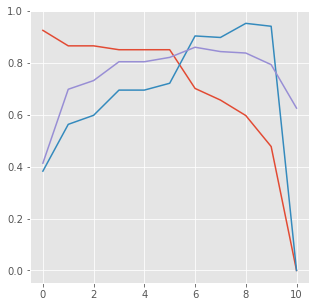

In [178]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(5,5))


ax = fig.add_subplot(1,1,1)
ax.plot(gr)

plt.show()

In [ ]:
plt.plot(sr_one.index, sr_one.values)

---------------
1. 오차행렬
[[90 22]
 [10 57]]
2. 정확도: 0.82
3. 정밀도: 0.72
4. 재현율: 0.85
---------------


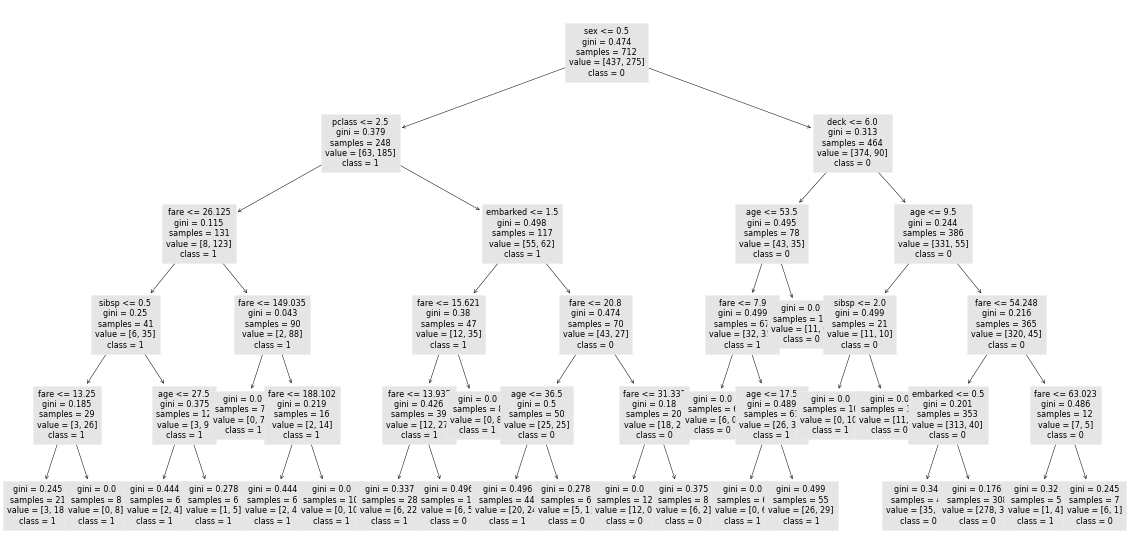

In [194]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    print('-'*15)
    print('1. 오차행렬')
    print(confusion)
    print('2. 정확도:', round(accuracy, 2))
    print('3. 정밀도:', round(precision, 2))
    print('4. 재현율:', round(recall, 2))
    print('-'*15)
    return accuracy, recall, precision


dtclf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)

plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'], 
          feature_names=X_train.columns, fontsize=8)
plt.show()

In [179]:
dtclf = DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        accuracy  = accuracy_score(y_test, custom_predict)
        recall    = recall_score(y_test, custom_predict)
        precision = precision_score(y_test, custom_predict)
        ts_accuracy.append(accuracy)
        ts_precision.append(precision)
        ts_recall.append(recall)
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()


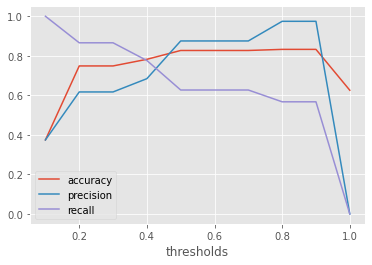

In [180]:
get_eval_by_threshold(y_test, pred_proba, thresholds)

In [181]:
from sklearn.metrics import f1_score

In [183]:
f1_score(y_test, pred)

0.7808219178082193

In [187]:
dtclf = DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
def get_eval_by_f1_score(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1_score = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        accuracy  = accuracy_score(y_test, custom_predict)
        recall    = recall_score(y_test, custom_predict)
        precision = precision_score(y_test, custom_predict)
        f1score = f1_score(y_test, custom_predict)
        ts_accuracy.append(accuracy)
        ts_precision.append(precision)
        ts_recall.append(recall)
        ts_f1_score.append(f1score)
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1_score'] = ts_f1_score
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()

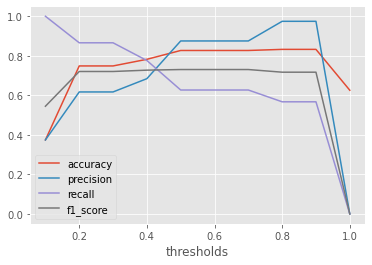

In [188]:
get_eval_by_f1_score(y_test, pred_proba, thresholds)

In [ ]:
dtclf = DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.01)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score=[]
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        accuracy  = accuracy_score(y_test, custom_predict)
        recall    = recall_score(y_test, custom_predict)
        precision = precision_score(y_test, custom_predict)
        f1score = f1_score(y_test,custom_predict)
        ts_accuracy.append(accuracy)
        ts_precision.append(precision)
        ts_recall.append(recall)
        ts_f1score.append(f1score)
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()

get_eval_by_threshold(y_test, pred_proba, thresholds)

---------------
1. 오차행렬
[[90 22]
 [10 57]]
2. 정확도: 0.82
3. 정밀도: 0.72
4. 재현율: 0.85
5. f1_score 0.78
---------------


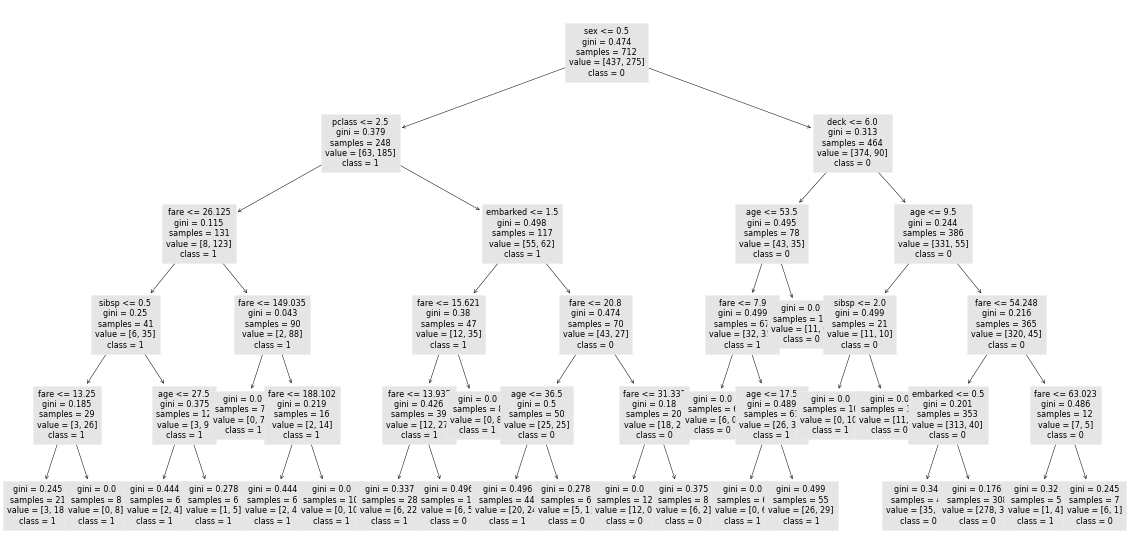

In [196]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    print('-'*15)
    print('1. 오차행렬')
    print(confusion)
    print('2. 정확도:', round(accuracy, 2))
    print('3. 정밀도:', round(precision, 2))
    print('4. 재현율:', round(recall, 2))
    print('5. f1_score', round(f1score, 2))
    print('-'*15)
    return accuracy, recall, precision


dtclf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)

plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'], 
          feature_names=X_train.columns, fontsize=8)
plt.show()

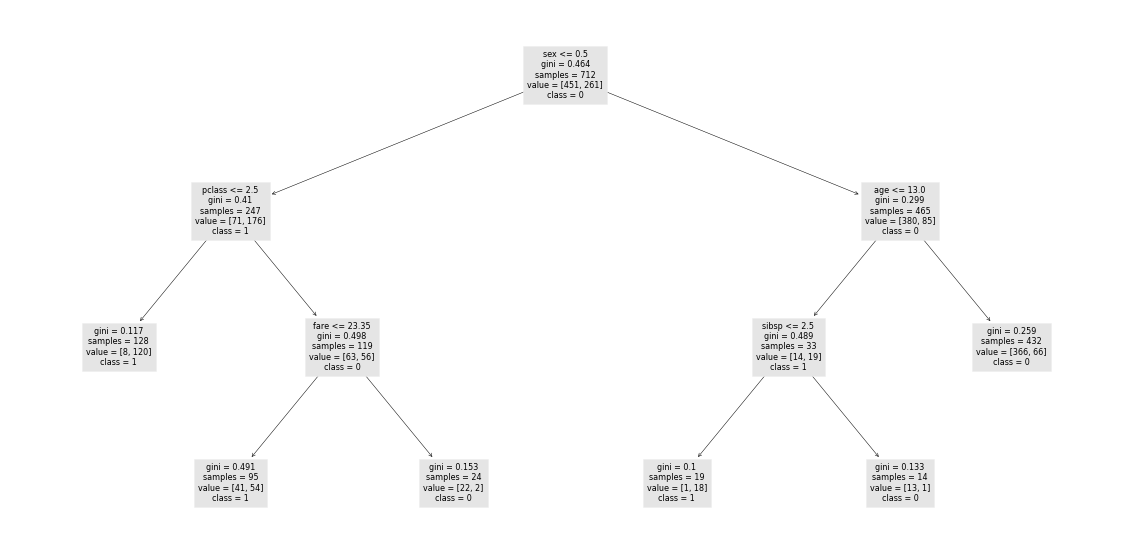

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
df = sns.load_dataset('titanic')
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
df1 = df.copy()
df1.deck = df1.deck.astype('O')
# 결측치 처리
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(df1.age.mean(), inplace=True)
df1.deck.fillna('N', inplace=True)
def label_encoding(df):
    ecs = df.columns[(df.dtypes=='O')|(df.dtypes=='category')|(df.dtypes=='bool')]
    for i in ecs:
        globals()[f'{df}_{i}_encoder'] = LabelEncoder()
        globals()[f'{df}_{i}_encoder'].fit(df[i])
        df[i] = globals()[f'{df}_{i}_encoder'].transform(df[i])
label_encoding(df1)
X = df1.drop('survived', axis=1)
y = df1.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score   = f1_score(y_test, pred)
    return accuracy, recall, precision, f1score
dtclf = DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)
plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'],
          feature_names=X_train.columns, fontsize=8)
plt.show()

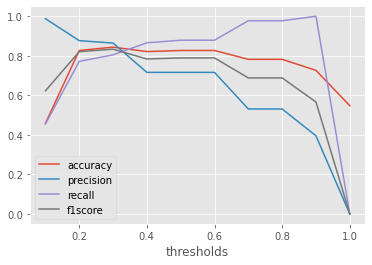

In [201]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        result = get_clf_eval(y_test, custom_predict)
        ts_accuracy.append(result[0])
        ts_precision.append(result[1])
        ts_recall.append(result[2])
        ts_f1score.append(result[3])
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()
dtclf = DecisionTreeClassifier(max_depth=4)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
get_eval_by_threshold(y_test, pred_proba, thresholds)

In [ ]:
bf = Binarizer

임곗값 배열의 index: [ 0  1  2  3  4  5  6  7  8  9 10]
전체 임곗값: [2.   1.   0.99 0.88 0.78 0.57 0.5  0.42 0.11 0.1  0.  ]
전체 임곗값별 FPR: [0.    0.    0.009 0.009 0.036 0.152 0.188 0.259 0.848 0.92  1.   ]
전체 임곗값별 TPR: [0.    0.03  0.328 0.597 0.657 0.761 0.836 0.851 0.925 0.94  1.   ]


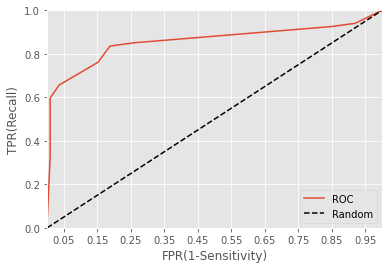

In [199]:
from sklearn.metrics import roc_curve
# 레이블 값이 1일 때의 예측 확률을 추출
pred_prob_class1 = dtclf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_prob_class1)
# 반환된 임곗값 배열 로우가 47건 추출
thr_index = np.arange(0, thresholds.shape[0])
print('임곗값 배열의 index:', thr_index)
print('전체 임곗값:', np.round(thresholds[thr_index], 2))
# 추출된 임곗값에 따른 FPR, TPR 값
print('전체 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('전체 임곗값별 TPR:', np.round(tprs[thr_index], 3))
def roc_curve_plot(y_test, pred_prob_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_prob_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y측 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
roc_curve_plot(y_test, pred_proba[:,1])

In [202]:
roc_curve(y_test, pred_prob_class1)

(array([0.        , 0.01020408, 0.09183673, 0.18367347, 0.25510204,
        0.35714286, 0.47959184, 0.8877551 , 0.94897959, 1.        ]),
 array([0.        , 0.01234568, 0.17283951, 0.28395062, 0.28395062,
        0.40740741, 0.48148148, 0.86419753, 0.90123457, 1.        ]),
 array([2.        , 1.        , 0.98876404, 0.875     , 0.77777778,
        0.57377049, 0.41666667, 0.11331445, 0.1       , 0.        ]))

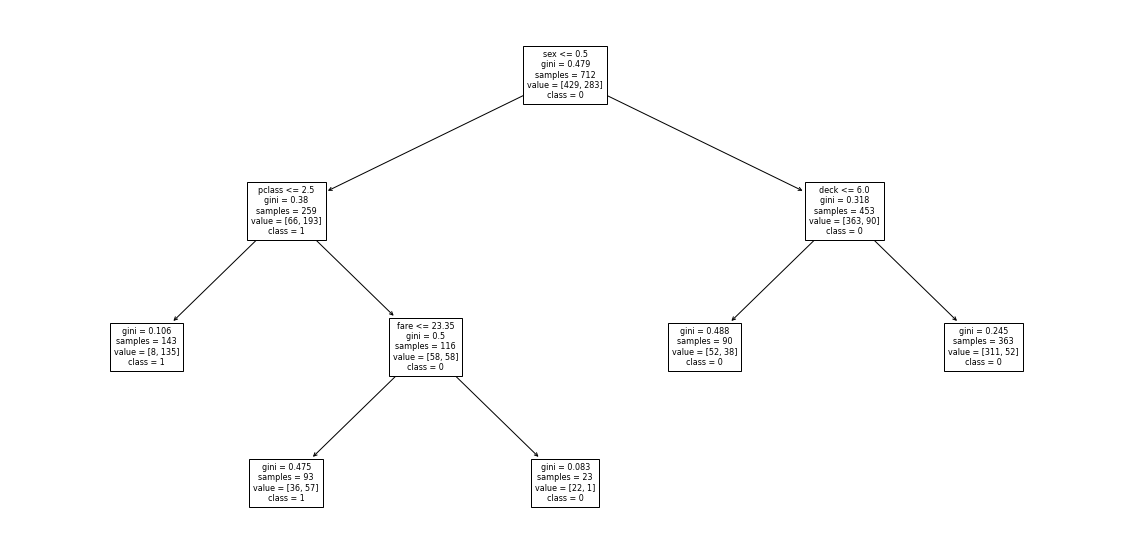

accuracy :  [0.73, 0.8, 0.8, 0.81, 0.81, 0.8, 0.8, 0.8, 0.8, 0.67]
f1_score :  [0.66, 0.71, 0.71, 0.71, 0.7, 0.62, 0.62, 0.62, 0.62, 0.0]
auc score :  [0.74, 0.79, 0.79, 0.79, 0.77, 0.73, 0.73, 0.72, 0.72, 0.5]


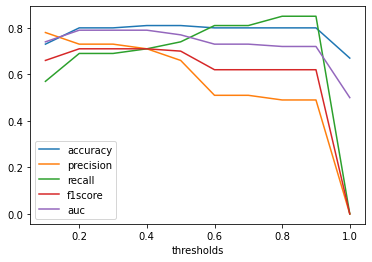

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import Binarizer
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
df1 = df.copy()
df1.deck = df1.deck.astype('O')
# 결측치 처리
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(df1.age.mean(), inplace=True)
df1.deck.fillna('N', inplace=True)
def label_encoding(df):
    ecs = df.columns[(df.dtypes=='O')|(df.dtypes=='category')|(df.dtypes=='bool')]
    for i in ecs:
        globals()[f'{df}_{i}_encoder'] = LabelEncoder()
        globals()[f'{df}_{i}_encoder'].fit(df[i])
        df[i] = globals()[f'{df}_{i}_encoder'].transform(df[i])
label_encoding(df1)
X = df1.drop('survived', axis=1)
y = df1.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score   = f1_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    return accuracy, recall, precision, f1score, auc
dtclf = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.01)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)
plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'],
          feature_names=X_train.columns, fontsize=8)
plt.show()

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score = []
    ts_auc = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        result = get_clf_eval(y_test, custom_predict)
        ts_accuracy.append(round(result[0],2))
        ts_precision.append(round(result[1],2))
        ts_recall.append(round(result[2],2))
        ts_f1score.append(round(result[3],2))
        ts_auc.append(round(result[4],2))
        
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    ts_datas['auc'] = ts_auc
    print('accuracy : ',ts_accuracy)
    print('f1_score : ',ts_f1score)
    print('auc score : ',ts_auc)
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()
    
dtclf = DecisionTreeClassifier(max_depth=6)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
get_eval_by_threshold(y_test, pred_proba, thresholds)


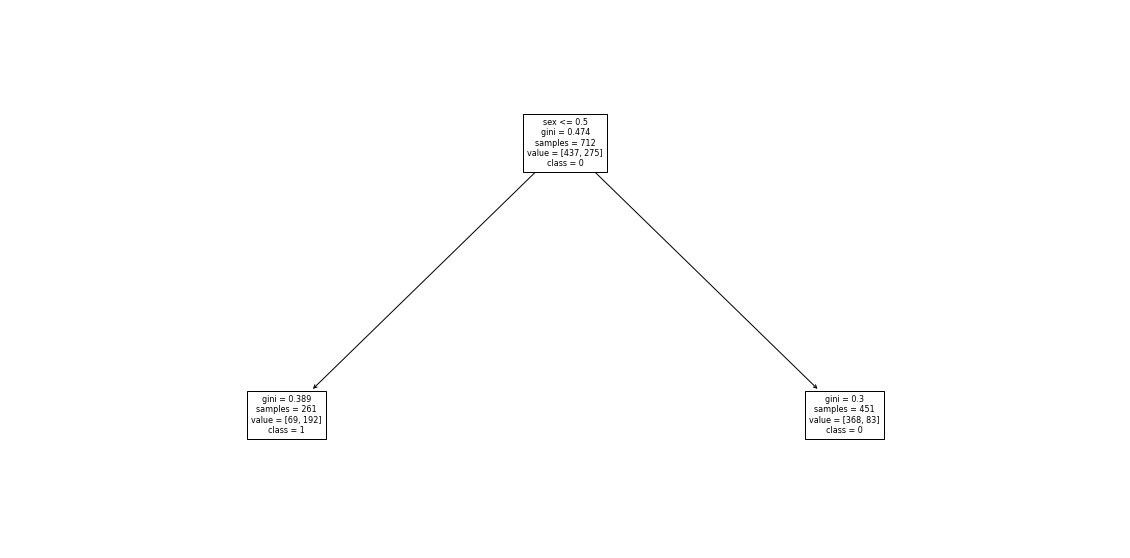

accuracy :  [0.71, 0.76, 0.79, 0.8, 0.82, 0.82, 0.8, 0.78, 0.78, 0.63]
f1_score :  [0.68, 0.71, 0.73, 0.72, 0.72, 0.72, 0.68, 0.61, 0.61, 0.0]
auc score :  [0.73, 0.76, 0.78, 0.77, 0.78, 0.78, 0.76, 0.71, 0.71, 0.5]


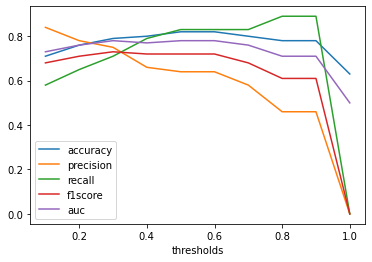

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import Binarizer
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
df1 = df.copy()
df1.deck = df1.deck.astype('O')
# 결측치 처리
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(df1.age.mean(), inplace=True)
df1.deck.fillna('N', inplace=True)
def label_encoding(df):
    ecs = df.columns[(df.dtypes=='O')|(df.dtypes=='category')|(df.dtypes=='bool')]
    for i in ecs:
        globals()[f'{df}_{i}_encoder'] = LabelEncoder()
        globals()[f'{df}_{i}_encoder'].fit(df[i])
        df[i] = globals()[f'{df}_{i}_encoder'].transform(df[i])
label_encoding(df1)
X = df1.drop('survived', axis=1)
y = df1.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score   = f1_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    return accuracy, recall, precision, f1score, auc
dtclf = DecisionTreeClassifier(ccp_alpha=0.05)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)
plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'],
          feature_names=X_train.columns, fontsize=8)
plt.show()

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score = []
    ts_auc = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        result = get_clf_eval(y_test, custom_predict)
        ts_accuracy.append(round(result[0],2))
        ts_precision.append(round(result[1],2))
        ts_recall.append(round(result[2],2))
        ts_f1score.append(round(result[3],2))
        ts_auc.append(round(result[4],2))
        
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    ts_datas['auc'] = ts_auc
    print('accuracy : ',ts_accuracy)
    print('f1_score : ',ts_f1score)
    print('auc score : ',ts_auc)
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()
    
dtclf = DecisionTreeClassifier(max_depth=6)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
get_eval_by_threshold(y_test, pred_proba, thresholds)

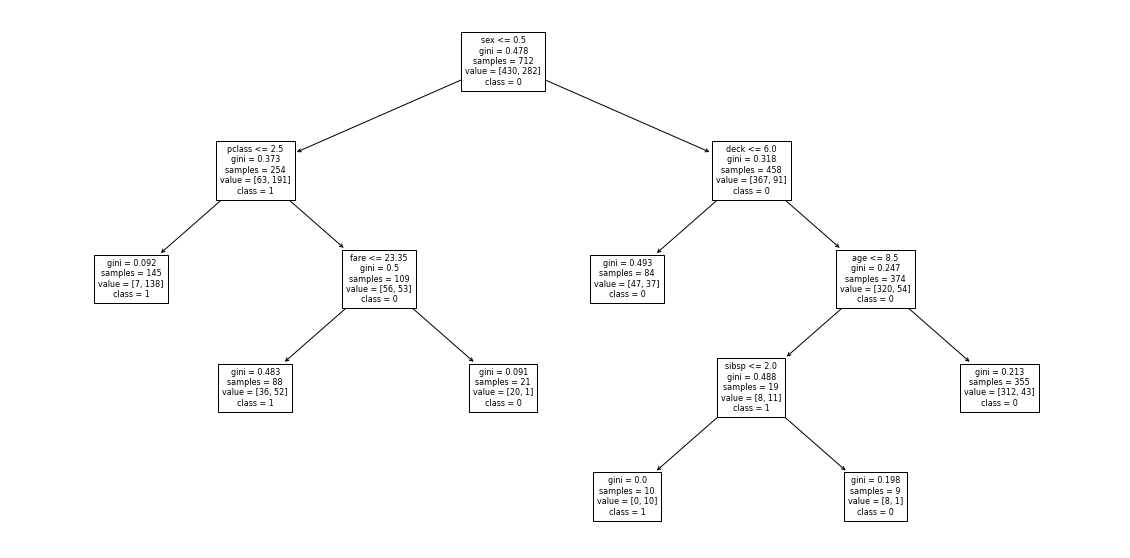

accuracy :  [0.5, 0.72, 0.76, 0.76, 0.76, 0.76, 0.79, 0.81, 0.75, 0.66]
f1_score :  [0.54, 0.64, 0.68, 0.68, 0.62, 0.62, 0.63, 0.66, 0.44, 0.0]
auc score :  [0.59, 0.73, 0.76, 0.76, 0.72, 0.72, 0.73, 0.75, 0.64, 0.5]


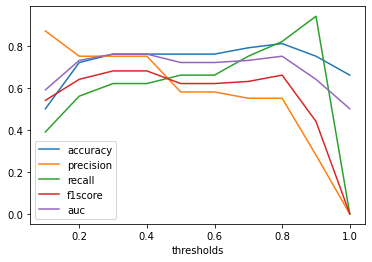

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import Binarizer

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score   = f1_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    return accuracy, recall, precision, f1score, auc
dtclf = (ccp_alpha=0.01)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)
plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'],
          feature_names=X_train.columns, fontsize=8)
plt.show()

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score = []
    ts_auc = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        result = get_clf_eval(y_test, custom_predict)
        ts_accuracy.append(round(result[0],2))
        ts_precision.append(round(result[1],2))
        ts_recall.append(round(result[2],2))
        ts_f1score.append(round(result[3],2))
        ts_auc.append(round(result[4],2))
        
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    ts_datas['auc'] = ts_auc
    print('accuracy : ',ts_accuracy)
    print('f1_score : ',ts_f1score)
    print('auc score : ',ts_auc)
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()
    
dtclf = DecisionTreeClassifier(max_depth=6)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
get_eval_by_threshold(y_test, pred_proba, thresholds)

In [207]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score = []
    ts_auc = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        result = get_clf_eval(y_test, custom_predict)
        ts_accuracy.append(round(result[0], 2))
        ts_precision.append(round(result[1], 2))
        ts_recall.append(round(result[2], 2))
        ts_f1score.append(round(result[3], 2))
        ts_auc.append(round(result[4], 2))
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    ts_datas['auc'] = ts_auc
    print('accuracy', ts_accuracy)
    print('f1_score', ts_f1score)
    print('auc score', ts_auc)
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()
dtclf = DecisionTreeClassifier(max_depth=4)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
get_eval_by_threshold(y_test, pred_proba, thresholds)

TypeError: type function doesn't define __round__ method

In [7]:
train_test_split([1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,9],[1,2,3,4,66,7,3,2], test_size=0.2) # 테스트용과 결과 확인용을 테스트 사이즈 비율로 나눠 줌

[[1, 5, 3, 2, 8, 4],
 [7, 6],
 [1, 5, 3, 2, 9, 4],
 [7, 6],
 [1, 66, 3, 2, 2, 4],
 [3, 7]]

[[7, 8, 3, 6, 4, 1], [2, 5]]